In [1]:
import torch
import torch.optim as optim
from torchvision import datasets, transforms
import torch.nn as nn
import torch.nn.functional as F

from model import GroupNormModel, BatchNormModel,LayerNormModel
from get_device import *
from utils import *


import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
from Datasets import CIFAR10
batch_size = 32
cifar10 = CIFAR10(batch_size)

Files already downloaded and verified
Files already downloaded and verified


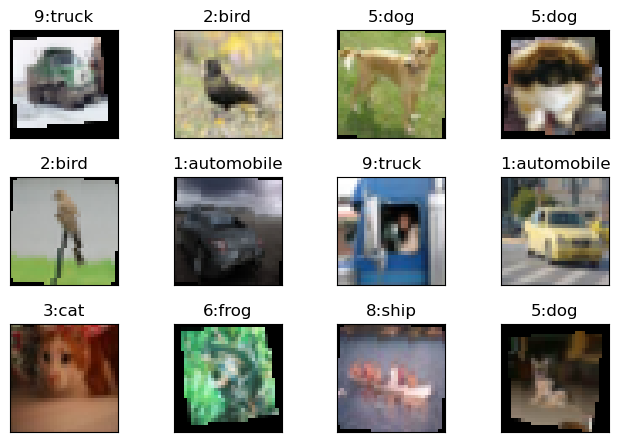

In [6]:
cifar10.show_examples()

# Group Normalization

    - No of Params: 47,818
    - Best Training Accuracy : `71.75`
    - Best Test Accuracy : `73.68`

In [7]:
set_seed(42)
model1 = GroupNormModel(n_groups=4, skip=True, dropout=0.01)
model1.summary(input_size=(batch_size, 3, 32, 32))


Device Selected: cuda


Layer (type:depth-idx)                   Input Shape               Output Shape              Param #                   Param %
GroupNormModel                           [32, 3, 32, 32]           [32, 10]                  --                             --
├─Sequential: 1-1                        [32, 3, 32, 32]           [32, 16, 28, 28]          --                             --
│    └─ConvLayer: 2-1                    [32, 3, 32, 32]           [32, 16, 30, 30]          --                             --
│    │    └─Conv2d: 3-1                  [32, 3, 32, 32]           [32, 16, 30, 30]          432                         0.90%
│    │    └─GroupNorm: 3-2               [32, 16, 30, 30]          [32, 16, 30, 30]          32                          0.07%
│    │    └─ReLU: 3-3                    [32, 16, 30, 30]          [32, 16, 30, 30]          --                             --
│    │    └─Dropout: 3-4                 [32, 16, 30, 30]          [32, 16, 30, 30]          --                

In [8]:
exp1 = Experiment(model1, cifar10, lr=0.01)
exp1.execute()

Epoch 1


Train: Loss=1.8280 Batch_id=1562 Train_Accuracy=30.02: 100%|██████████| 1563/1563 [01:48<00:00, 14.36it/s]


Test: Average loss: 1.5593, Test_Accuracy: 40.99
Epoch 2


Train: Loss=0.8903 Batch_id=1562 Train_Accuracy=45.17: 100%|██████████| 1563/1563 [01:42<00:00, 15.32it/s]


Test: Average loss: 1.3991, Test_Accuracy: 47.93
Epoch 3


Train: Loss=1.4650 Batch_id=1562 Train_Accuracy=51.30: 100%|██████████| 1563/1563 [01:42<00:00, 15.25it/s]


Test: Average loss: 1.2080, Test_Accuracy: 56.22
Epoch 4


Train: Loss=1.1232 Batch_id=1562 Train_Accuracy=55.56: 100%|██████████| 1563/1563 [01:43<00:00, 15.12it/s]


Test: Average loss: 1.1259, Test_Accuracy: 58.84
Epoch 5


Train: Loss=0.7460 Batch_id=1562 Train_Accuracy=57.68: 100%|██████████| 1563/1563 [01:42<00:00, 15.22it/s]


Test: Average loss: 1.0970, Test_Accuracy: 60.48
Epoch 6


Train: Loss=0.7799 Batch_id=1562 Train_Accuracy=59.89: 100%|██████████| 1563/1563 [01:40<00:00, 15.54it/s]


Test: Average loss: 0.9955, Test_Accuracy: 64.39
Epoch 7


Train: Loss=0.8126 Batch_id=1562 Train_Accuracy=61.85: 100%|██████████| 1563/1563 [01:42<00:00, 15.27it/s]


Test: Average loss: 0.9228, Test_Accuracy: 66.72
Epoch 8


Train: Loss=0.6824 Batch_id=1562 Train_Accuracy=62.77: 100%|██████████| 1563/1563 [01:41<00:00, 15.44it/s]


Test: Average loss: 0.9370, Test_Accuracy: 66.36
Epoch 00008: reducing learning rate of group 0 to 3.0000e-03.
Epoch 9


Train: Loss=1.0525 Batch_id=1562 Train_Accuracy=66.87: 100%|██████████| 1563/1563 [01:42<00:00, 15.30it/s]


Test: Average loss: 0.8585, Test_Accuracy: 69.25
Epoch 10


Train: Loss=0.4770 Batch_id=1562 Train_Accuracy=67.64: 100%|██████████| 1563/1563 [01:41<00:00, 15.43it/s]


Test: Average loss: 0.8428, Test_Accuracy: 69.65
Epoch 11


Train: Loss=1.0226 Batch_id=1562 Train_Accuracy=68.20: 100%|██████████| 1563/1563 [01:45<00:00, 14.82it/s]


Test: Average loss: 0.8220, Test_Accuracy: 71.55
Epoch 12


Train: Loss=0.4506 Batch_id=1562 Train_Accuracy=68.53: 100%|██████████| 1563/1563 [01:44<00:00, 14.90it/s]


Test: Average loss: 0.8089, Test_Accuracy: 71.63
Epoch 13


Train: Loss=0.8962 Batch_id=1562 Train_Accuracy=69.15: 100%|██████████| 1563/1563 [01:50<00:00, 14.19it/s]


Test: Average loss: 0.8434, Test_Accuracy: 69.63
Epoch 00013: reducing learning rate of group 0 to 9.0000e-04.
Epoch 14


Train: Loss=0.7139 Batch_id=1562 Train_Accuracy=70.64: 100%|██████████| 1563/1563 [02:08<00:00, 12.15it/s]


Test: Average loss: 0.7852, Test_Accuracy: 72.35
Epoch 15


Train: Loss=0.3729 Batch_id=1562 Train_Accuracy=70.79: 100%|██████████| 1563/1563 [01:11<00:00, 21.78it/s]


Test: Average loss: 0.7776, Test_Accuracy: 72.84
Epoch 16


Train: Loss=1.2232 Batch_id=1562 Train_Accuracy=71.08: 100%|██████████| 1563/1563 [01:06<00:00, 23.53it/s]


Test: Average loss: 0.7680, Test_Accuracy: 73.17
Epoch 17


Train: Loss=0.7772 Batch_id=1562 Train_Accuracy=70.88: 100%|██████████| 1563/1563 [01:05<00:00, 23.98it/s]


Test: Average loss: 0.7745, Test_Accuracy: 72.86
Epoch 00017: reducing learning rate of group 0 to 2.7000e-04.
Epoch 18


Train: Loss=1.0473 Batch_id=1562 Train_Accuracy=71.47: 100%|██████████| 1563/1563 [01:01<00:00, 25.30it/s]


Test: Average loss: 0.7569, Test_Accuracy: 73.39
Epoch 19


Train: Loss=0.9872 Batch_id=1562 Train_Accuracy=71.72: 100%|██████████| 1563/1563 [01:09<00:00, 22.34it/s]


Test: Average loss: 0.7581, Test_Accuracy: 73.48
Epoch 00019: reducing learning rate of group 0 to 8.1000e-05.
Epoch 20


Train: Loss=0.5702 Batch_id=1562 Train_Accuracy=71.75: 100%|██████████| 1563/1563 [01:06<00:00, 23.62it/s]


Test: Average loss: 0.7522, Test_Accuracy: 73.68


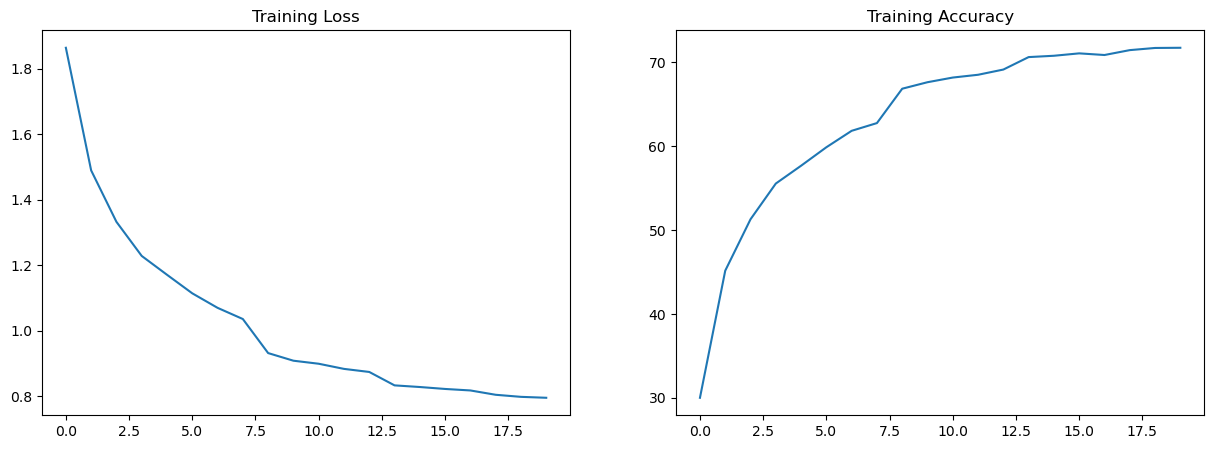

In [13]:

exp1.train.plot_stats()

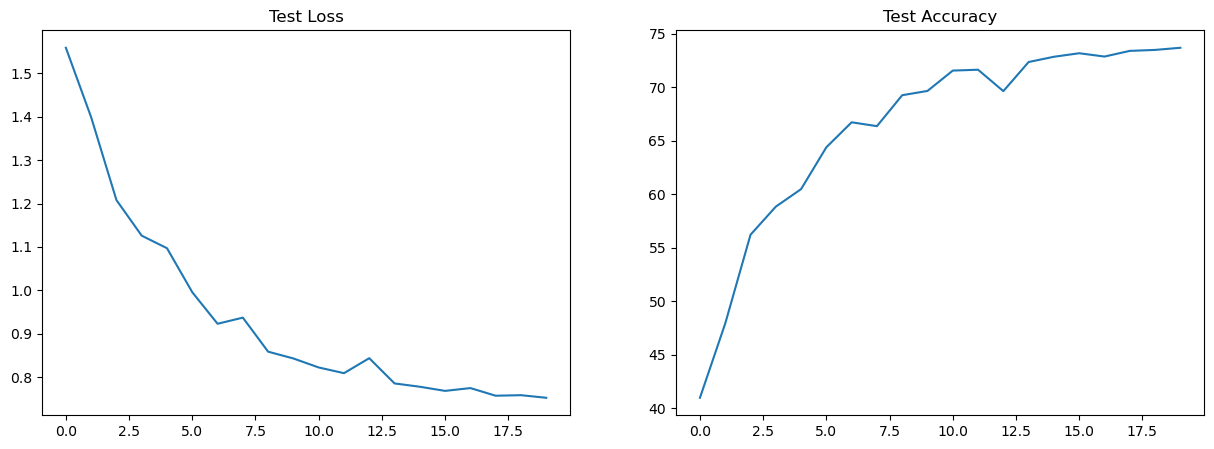

In [10]:

exp1.test.plot_stats()

Test: Average loss: 0.7522, Test_Accuracy: 73.68


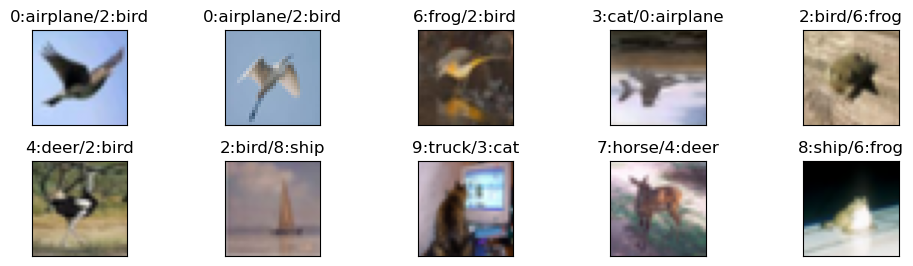

In [14]:

exp1.show_incorrect()

# Batch Normalization

    - No of Params: 47,818
    - Best Training Accuracy : `76.28`
    - Best Test Accuracy : `79.57`

In [15]:
model2 = BatchNormModel(skip=True, dropout=0.01)
model2.summary(input_size=(batch_size, 3, 32, 32))

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #                   Param %
BatchNormModel                           [32, 3, 32, 32]           [32, 10]                  --                             --
├─Sequential: 1-1                        [32, 3, 32, 32]           [32, 16, 28, 28]          --                             --
│    └─ConvLayer: 2-1                    [32, 3, 32, 32]           [32, 16, 30, 30]          --                             --
│    │    └─Conv2d: 3-1                  [32, 3, 32, 32]           [32, 16, 30, 30]          432                         0.90%
│    │    └─BatchNorm2d: 3-2             [32, 16, 30, 30]          [32, 16, 30, 30]          32                          0.07%
│    │    └─ReLU: 3-3                    [32, 16, 30, 30]          [32, 16, 30, 30]          --                             --
│    │    └─Dropout: 3-4                 [32, 16, 30, 30]          [32, 16, 30, 30]          --                

In [16]:
bn = Experiment(model2, cifar10)
bn.execute()

Epoch 1


Train: Loss=2.3476 Batch_id=4 Train_Accuracy=12.50:   0%|          | 5/1563 [00:38<2:30:17,  5.79s/it] Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x0000020C36653AF0>
Traceback (most recent call last):
  File "c:\Users\shash\anaconda3\lib\site-packages\torch\utils\data\dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "c:\Users\shash\anaconda3\lib\site-packages\torch\utils\data\dataloader.py", line 1436, in _shutdown_workers
    if self._persistent_workers or self._workers_status[worker_id]:
AttributeError: '_MultiProcessingDataLoaderIter' object has no attribute '_workers_status'
Train: Loss=1.1286 Batch_id=1562 Train_Accuracy=42.54: 100%|██████████| 1563/1563 [01:06<00:00, 23.37it/s]


Test: Average loss: 1.2858, Test_Accuracy: 52.96
Epoch 2


Train: Loss=1.0402 Batch_id=1562 Train_Accuracy=54.39: 100%|██████████| 1563/1563 [01:09<00:00, 22.40it/s]


Test: Average loss: 1.0919, Test_Accuracy: 59.74
Epoch 3


Train: Loss=0.9136 Batch_id=1562 Train_Accuracy=59.50: 100%|██████████| 1563/1563 [00:59<00:00, 26.21it/s]


Test: Average loss: 0.9557, Test_Accuracy: 65.93
Epoch 4


Train: Loss=1.1270 Batch_id=1562 Train_Accuracy=62.75: 100%|██████████| 1563/1563 [01:03<00:00, 24.57it/s]


Test: Average loss: 0.9513, Test_Accuracy: 66.01
Epoch 5


Train: Loss=1.0275 Batch_id=1562 Train_Accuracy=65.31: 100%|██████████| 1563/1563 [01:01<00:00, 25.26it/s]


Test: Average loss: 0.8598, Test_Accuracy: 68.87
Epoch 6


Train: Loss=0.7406 Batch_id=1562 Train_Accuracy=66.93: 100%|██████████| 1563/1563 [01:04<00:00, 24.32it/s]


Test: Average loss: 0.8039, Test_Accuracy: 71.65
Epoch 7


Train: Loss=1.0622 Batch_id=1562 Train_Accuracy=68.28: 100%|██████████| 1563/1563 [01:02<00:00, 25.02it/s]


Test: Average loss: 0.8033, Test_Accuracy: 71.70
Epoch 8


Train: Loss=1.1484 Batch_id=1562 Train_Accuracy=69.17: 100%|██████████| 1563/1563 [01:00<00:00, 25.65it/s]


Test: Average loss: 0.7477, Test_Accuracy: 73.91
Epoch 9


Train: Loss=1.4448 Batch_id=1562 Train_Accuracy=70.05: 100%|██████████| 1563/1563 [01:03<00:00, 24.43it/s]


Test: Average loss: 0.7330, Test_Accuracy: 74.05
Epoch 10


Train: Loss=1.0034 Batch_id=1562 Train_Accuracy=70.56: 100%|██████████| 1563/1563 [00:59<00:00, 26.12it/s]


Test: Average loss: 0.6985, Test_Accuracy: 75.39
Epoch 11


Train: Loss=0.7881 Batch_id=1562 Train_Accuracy=71.25: 100%|██████████| 1563/1563 [01:04<00:00, 24.40it/s]


Test: Average loss: 0.7309, Test_Accuracy: 74.45
Epoch 00011: reducing learning rate of group 0 to 3.0000e-03.
Epoch 12


Train: Loss=0.5647 Batch_id=1562 Train_Accuracy=74.11: 100%|██████████| 1563/1563 [01:06<00:00, 23.33it/s]


Test: Average loss: 0.6421, Test_Accuracy: 77.62
Epoch 13


Train: Loss=1.0182 Batch_id=1562 Train_Accuracy=74.55: 100%|██████████| 1563/1563 [01:02<00:00, 24.95it/s]


Test: Average loss: 0.6318, Test_Accuracy: 78.13
Epoch 14


Train: Loss=0.6276 Batch_id=1562 Train_Accuracy=75.08: 100%|██████████| 1563/1563 [01:03<00:00, 24.75it/s]


Test: Average loss: 0.6200, Test_Accuracy: 78.43
Epoch 15


Train: Loss=0.7120 Batch_id=1562 Train_Accuracy=74.74: 100%|██████████| 1563/1563 [00:59<00:00, 26.21it/s]


Test: Average loss: 0.6204, Test_Accuracy: 78.41
Epoch 00015: reducing learning rate of group 0 to 9.0000e-04.
Epoch 16


Train: Loss=0.6998 Batch_id=1562 Train_Accuracy=75.92: 100%|██████████| 1563/1563 [00:59<00:00, 26.44it/s]


Test: Average loss: 0.5994, Test_Accuracy: 79.24
Epoch 17


Train: Loss=0.6893 Batch_id=1562 Train_Accuracy=76.04: 100%|██████████| 1563/1563 [01:02<00:00, 25.02it/s]


Test: Average loss: 0.5965, Test_Accuracy: 79.43
Epoch 18


Train: Loss=0.5603 Batch_id=1562 Train_Accuracy=76.17: 100%|██████████| 1563/1563 [01:01<00:00, 25.52it/s]


Test: Average loss: 0.5908, Test_Accuracy: 79.47
Epoch 19


Train: Loss=0.6181 Batch_id=1562 Train_Accuracy=76.28: 100%|██████████| 1563/1563 [00:59<00:00, 26.31it/s]


Test: Average loss: 0.5901, Test_Accuracy: 79.39
Epoch 20


Train: Loss=0.9408 Batch_id=1562 Train_Accuracy=76.13: 100%|██████████| 1563/1563 [00:59<00:00, 26.40it/s]


Test: Average loss: 0.5874, Test_Accuracy: 79.57


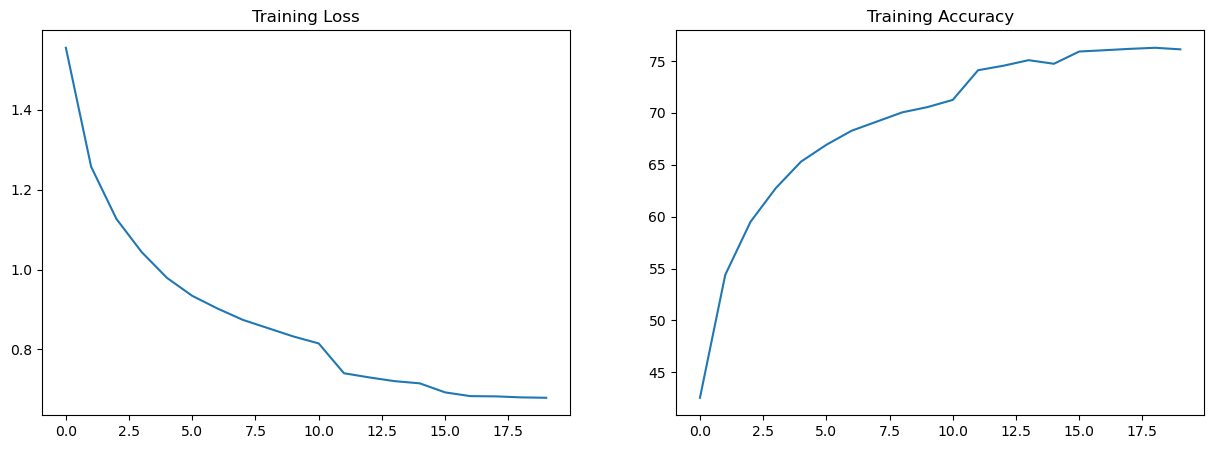

In [17]:
bn.train.plot_stats()

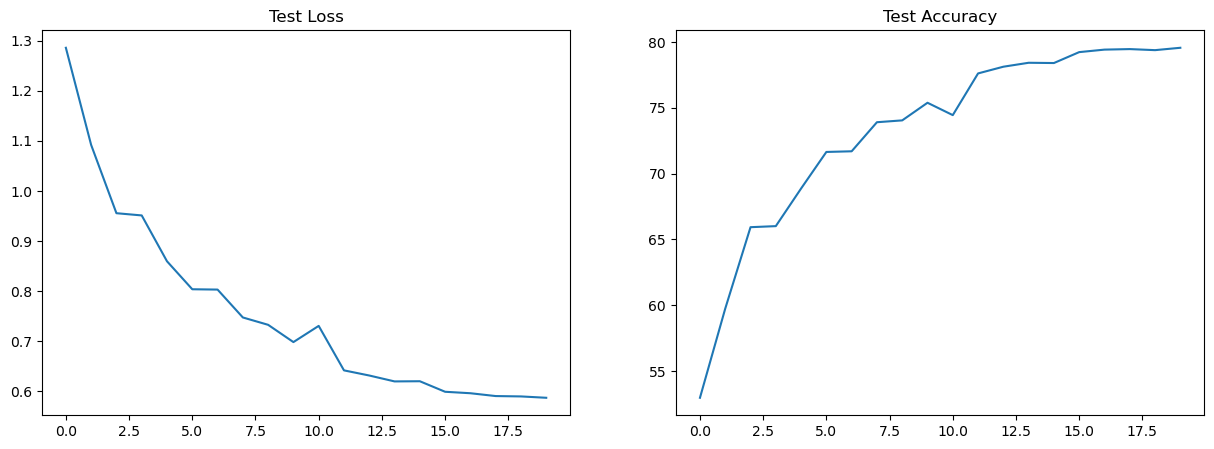

In [18]:
bn.test.plot_stats()

Test: Average loss: 0.5874, Test_Accuracy: 79.57


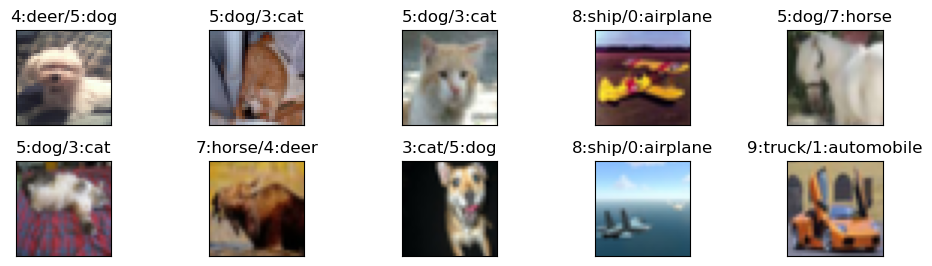

In [19]:
bn.show_incorrect()

# Layer Normalization

    - No of Params: 47,818
    - Best Training Accuracy : `66.94`
    - Best Test Accuracy : `68.55`

In [20]:
model3 = LayerNormModel(skip=True, dropout=0.01)
model2.summary(input_size=(batch_size, 3, 32, 32))

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #                   Param %
BatchNormModel                           [32, 3, 32, 32]           [32, 10]                  --                             --
├─Sequential: 1-1                        [32, 3, 32, 32]           [32, 16, 28, 28]          --                             --
│    └─ConvLayer: 2-1                    [32, 3, 32, 32]           [32, 16, 30, 30]          --                             --
│    │    └─Conv2d: 3-1                  [32, 3, 32, 32]           [32, 16, 30, 30]          432                         0.90%
│    │    └─BatchNorm2d: 3-2             [32, 16, 30, 30]          [32, 16, 30, 30]          32                          0.07%
│    │    └─ReLU: 3-3                    [32, 16, 30, 30]          [32, 16, 30, 30]          --                             --
│    │    └─Dropout: 3-4                 [32, 16, 30, 30]          [32, 16, 30, 30]          --                

In [21]:
ln = Experiment(model3, cifar10)
ln.execute()

Epoch 1


Train: Loss=2.3800 Batch_id=1562 Train_Accuracy=28.71: 100%|██████████| 1563/1563 [01:00<00:00, 25.64it/s]


Test: Average loss: 1.6030, Test_Accuracy: 40.17
Epoch 2


Train: Loss=1.4542 Batch_id=1562 Train_Accuracy=41.66: 100%|██████████| 1563/1563 [01:00<00:00, 25.71it/s]


Test: Average loss: 1.3767, Test_Accuracy: 49.35
Epoch 3


Train: Loss=1.2276 Batch_id=1562 Train_Accuracy=48.12: 100%|██████████| 1563/1563 [01:07<00:00, 23.07it/s]


Test: Average loss: 1.2200, Test_Accuracy: 55.32
Epoch 4


Train: Loss=1.4184 Batch_id=1562 Train_Accuracy=52.73: 100%|██████████| 1563/1563 [01:01<00:00, 25.31it/s]


Test: Average loss: 1.2510, Test_Accuracy: 54.60
Epoch 00004: reducing learning rate of group 0 to 3.0000e-03.
Epoch 5


Train: Loss=1.4475 Batch_id=1562 Train_Accuracy=58.15: 100%|██████████| 1563/1563 [01:01<00:00, 25.36it/s]


Test: Average loss: 1.0613, Test_Accuracy: 61.41
Epoch 6


Train: Loss=1.1127 Batch_id=1562 Train_Accuracy=59.63: 100%|██████████| 1563/1563 [01:02<00:00, 25.14it/s]


Test: Average loss: 1.0151, Test_Accuracy: 63.02
Epoch 7


Train: Loss=0.9027 Batch_id=1562 Train_Accuracy=60.73: 100%|██████████| 1563/1563 [01:01<00:00, 25.59it/s]


Test: Average loss: 0.9911, Test_Accuracy: 64.07
Epoch 8


Train: Loss=1.3764 Batch_id=1562 Train_Accuracy=61.75: 100%|██████████| 1563/1563 [01:01<00:00, 25.44it/s]


Test: Average loss: 1.0151, Test_Accuracy: 63.07
Epoch 00008: reducing learning rate of group 0 to 9.0000e-04.
Epoch 9


Train: Loss=0.7251 Batch_id=1562 Train_Accuracy=63.97: 100%|██████████| 1563/1563 [01:01<00:00, 25.59it/s]


Test: Average loss: 0.9366, Test_Accuracy: 66.25
Epoch 10


Train: Loss=0.7575 Batch_id=1562 Train_Accuracy=64.38: 100%|██████████| 1563/1563 [01:00<00:00, 25.85it/s]


Test: Average loss: 0.9352, Test_Accuracy: 66.28
Epoch 11


Train: Loss=0.7390 Batch_id=1562 Train_Accuracy=64.98: 100%|██████████| 1563/1563 [00:59<00:00, 26.37it/s]


Test: Average loss: 0.9225, Test_Accuracy: 66.84
Epoch 12


Train: Loss=0.9944 Batch_id=1562 Train_Accuracy=64.77: 100%|██████████| 1563/1563 [01:01<00:00, 25.25it/s]


Test: Average loss: 0.9046, Test_Accuracy: 67.36
Epoch 13


Train: Loss=0.9236 Batch_id=1562 Train_Accuracy=65.63: 100%|██████████| 1563/1563 [01:01<00:00, 25.60it/s]


Test: Average loss: 0.9046, Test_Accuracy: 67.54
Epoch 00013: reducing learning rate of group 0 to 2.7000e-04.
Epoch 14


Train: Loss=1.2562 Batch_id=1562 Train_Accuracy=66.05: 100%|██████████| 1563/1563 [01:05<00:00, 23.96it/s]


Test: Average loss: 0.8818, Test_Accuracy: 68.25
Epoch 15


Train: Loss=0.9964 Batch_id=1562 Train_Accuracy=66.45: 100%|██████████| 1563/1563 [01:01<00:00, 25.40it/s]


Test: Average loss: 0.8843, Test_Accuracy: 68.31
Epoch 00015: reducing learning rate of group 0 to 8.1000e-05.
Epoch 16


Train: Loss=0.6062 Batch_id=1562 Train_Accuracy=66.60: 100%|██████████| 1563/1563 [01:01<00:00, 25.22it/s]


Test: Average loss: 0.8729, Test_Accuracy: 68.51
Epoch 17


Train: Loss=1.0827 Batch_id=1562 Train_Accuracy=66.60: 100%|██████████| 1563/1563 [01:00<00:00, 25.82it/s]


Test: Average loss: 0.8754, Test_Accuracy: 68.47
Epoch 00017: reducing learning rate of group 0 to 2.4300e-05.
Epoch 18


Train: Loss=0.8237 Batch_id=1562 Train_Accuracy=66.63: 100%|██████████| 1563/1563 [01:01<00:00, 25.38it/s]


Test: Average loss: 0.8728, Test_Accuracy: 68.47
Epoch 19


Train: Loss=1.0047 Batch_id=1562 Train_Accuracy=66.64: 100%|██████████| 1563/1563 [01:01<00:00, 25.32it/s]


Test: Average loss: 0.8728, Test_Accuracy: 68.47
Epoch 00019: reducing learning rate of group 0 to 7.2900e-06.
Epoch 20


Train: Loss=1.1330 Batch_id=1562 Train_Accuracy=66.94: 100%|██████████| 1563/1563 [01:00<00:00, 25.84it/s]


Test: Average loss: 0.8728, Test_Accuracy: 68.55
Epoch 00020: reducing learning rate of group 0 to 2.1870e-06.


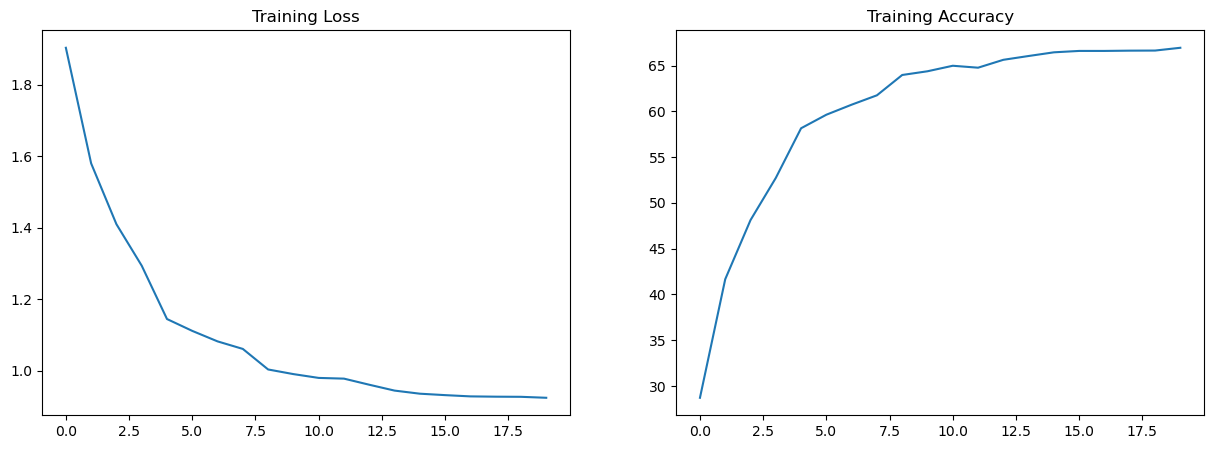

In [22]:
ln.train.plot_stats()

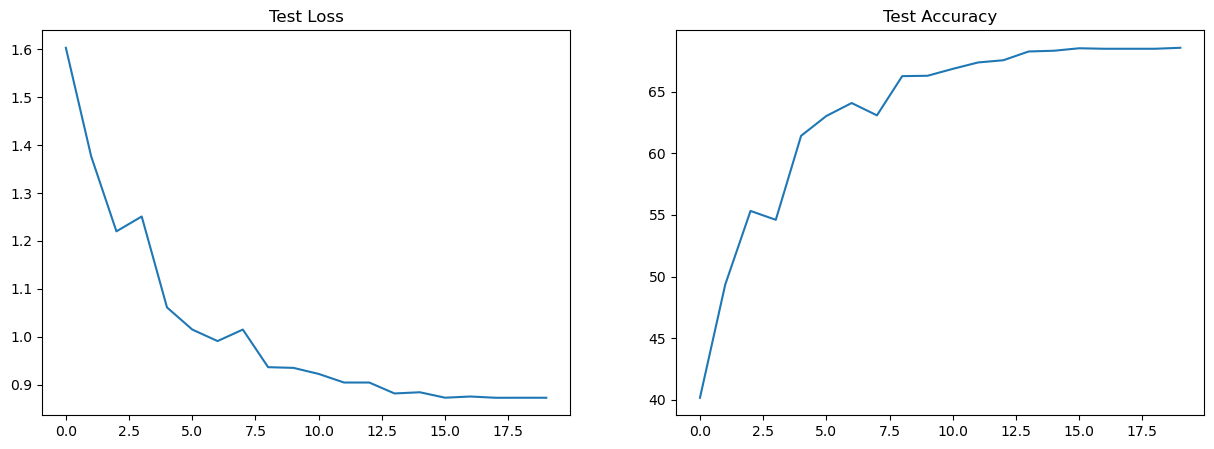

In [23]:
ln.test.plot_stats()

Test: Average loss: 0.8728, Test_Accuracy: 68.55


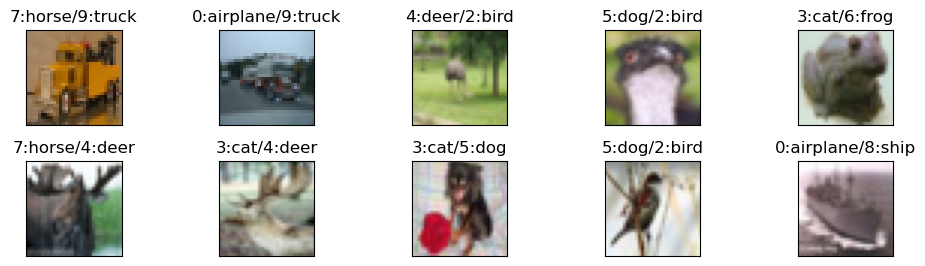

In [24]:
ln.show_incorrect()